# neural network on top 25 most important features per recursive feature elimination package

In [ ]:
from keras.models import model_from_json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import *
from keras import callbacks
from keras.utils.np_utils import *

print("Done Loading")


Done Loading


In [ ]:
full_df = pd.read_csv("https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv")

full_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,...,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [ ]:
len(full_df[full_df.phishing == 1])

30647

In [ ]:
len(full_df[full_df.phishing != 1])

58000

# neural network model on entire dataset

In [ ]:
y = full_df.iloc[:,-1]

features = ['qty_slash_url', 'length_url', 'qty_dot_domain', 'domain_length',
       'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_at_directory', 'qty_comma_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_at_file',
       'qty_exclamation_file', 'qty_space_file', 'qty_dollar_file',
       'file_length', 'time_response', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'ttl_hostname']
X = full_df[features]

X = tf.keras.utils.normalize(X, axis=-1, order=2)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=808)

train_X.head()

,qty_slash_url,length_url,qty_dot_domain,domain_length,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_at_directory,qty_comma_directory,qty_asterisk_directory,qty_hashtag_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_at_file,qty_exclamation_file,qty_space_file,qty_dollar_file,file_length,time_response,asn_ip,time_domain_activation,time_domain_expiration,ttl_hostname
5676,0.000004,0.000042,0.000004,0.000038,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.999934,0.000591,0.000797,0.011480
39002,0.000000,0.003369,0.000777,0.003369,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,0.000063,0.730211,-0.000259,0.680200,0.064004
1732,0.000000,0.000737,0.000092,0.000737,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,0.000020,0.698307,0.269674,0.016112,0.662860
39668,0.000000,0.001588,0.000122,0.001588,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,0.000038,0.859058,0.261792,0.005926,0.439823
82035,0.000000,0.000751,0.000054,0.000751,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,0.000004,0.795440,0.178787,0.007212,0.579014


In [ ]:
tf.keras.backend.clear_session()

#neural net

top_25_nn = keras.Sequential([
                          layers.InputLayer(input_shape=[25]),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=50, activation='relu'),
                          layers.Dropout(0.20),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=111, activation='relu'),
                          layers.Flatten(),
                          layers.Dense(units=1, activation='sigmoid')
])

top_25_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5), 
             tf.keras.metrics.AUC(),
             ]
)

earlystopping = callbacks.EarlyStopping(monitor = 'val_binary_accuracy', mode = 'max',
                                       patience = 25, restore_best_weights = True)


top_25_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

In [ ]:
history1 = top_25_nn.fit(train_X, train_y, validation_split=0.30, batch_size= 15, epochs=500, callbacks = [earlystopping])

Epoch 1/500
3103/3103 [==============================] - 10s 3ms/step - loss: 0.5875 - binary_accuracy: 0.6723 - auc: 0.6994 - val_loss: 0.5425 - val_binary_accuracy: 0.7161 - val_auc: 0.7649
Epoch 2/500
3103/3103 [==============================] - 8s 3ms/step - loss: 0.5436 - binary_accuracy: 0.7115 - auc: 0.7554 - val_loss: 0.4499 - val_binary_accuracy: 0.7830 - val_auc: 0.8586
Epoch 3/500
3103/3103 [==============================] - 8s 3ms/step - loss: 0.4486 - binary_accuracy: 0.7920 - auc: 0.8541 - val_loss: 0.3224 - val_binary_accuracy: 0.8661 - val_auc: 0.9413
Epoch 4/500
3103/3103 [==============================] - 8s 3ms/step - loss: 0.3826 - binary_accuracy: 0.8408 - auc: 0.9056 - val_loss: 0.3110 - val_binary_accuracy: 0.8900 - val_auc: 0.9476
Epoch 5/500
3103/3103 [==============================] - 8s 3ms/step - loss: 0.3651 - binary_accuracy: 0.8495 - auc: 0.9132 - val_loss: 0.2857 - val_binary_accuracy: 0.8773 - val_auc: 0.9550
Epoch 6/500
3103/3103 [=====================

In [ ]:
history_df1 = pd.DataFrame(history1.history)

history_df1.describe()

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.272826,0.890982,0.945656,0.259895,0.902562,0.958889
std,0.040448,0.024843,0.024543,0.063481,0.036571,0.020106
min,0.247168,0.693956,0.740078,0.214972,0.559511,0.764887
25%,0.256539,0.893471,0.947900,0.232939,0.903051,0.960459
50%,0.263108,0.896775,0.950741,0.245443,0.910007,0.962408
75%,0.271161,0.899090,0.952439,0.259995,0.914469,0.964057
max,0.565005,0.904811,0.955789,0.778097,0.920485,0.966509


In [ ]:
train_acc = top_25_nn.evaluate(train_X, train_y)
test_acc = top_25_nn.evaluate(val_X, val_y)

693/693 [==============================] - 1s 1ms/step - loss: 0.2259 - binary_accuracy: 0.9193 - auc: 0.9615


In [ ]:
dict(zip(top_25_nn.metrics_names, test_acc))

{'auc': 0.9614761471748352,
 'binary_accuracy': 0.919276237487793,
 'loss': 0.2258671522140503}

Minimum validation loss (binary_crossentropy): 0.214972123503685


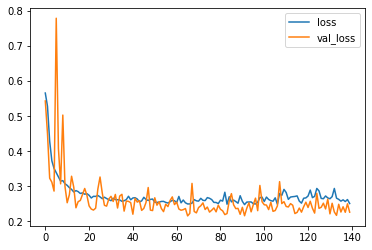

In [ ]:
history_df1.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss (binary_crossentropy): {}".format(history_df1['val_loss'].min()))

Maximum AUC: 0.9665091037750244


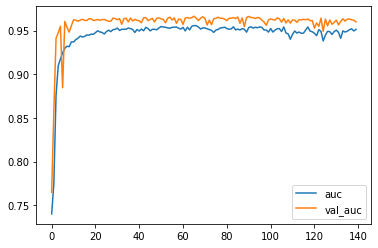

In [ ]:
history_df1.loc[:, ['auc', 'val_auc']].plot();
print("Maximum AUC: {}".format(history_df1['val_auc'].max()))

Maximum validation binary accuracy: 0.9204853177070618


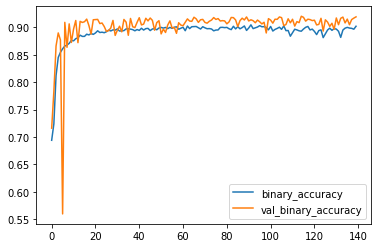

In [ ]:
history_df1.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
print("Maximum validation binary accuracy: {}".format(history_df1['val_binary_accuracy'].max()))

In [ ]:
history_df1.binary_accuracy.max() - history_df1.val_binary_accuracy.max()

-0.015674293041229248

In [ ]:
preds1 = top_25_nn.predict(val_X)
preds1

array([[0.8809597 ],
       [0.01403442],
       [0.46531808],
       ...,
       [0.0805707 ],
       [0.02607417],
       [0.8809597 ]], dtype=float32)

In [ ]:
len(preds1[preds1 <= 0.5])

13568

In [ ]:
len(preds1[preds1 > 0.5])

8594

In [ ]:
len(val_y)

22162

In [ ]:
preds_df = pd.DataFrame(preds1, columns = ['preds'])

preds_df.head()

,preds
0,0.880960
1,0.014034
2,0.465318
3,0.027623
4,0.880960


In [ ]:
preds_df = pd.concat([preds_df, val_y.reset_index(drop=True), val_X.reset_index()], axis=1)

preds_df

,preds,phishing,index,qty_slash_url,length_url,qty_dot_domain,domain_length,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_at_directory,qty_comma_directory,qty_asterisk_directory,qty_hashtag_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_at_file,qty_exclamation_file,qty_space_file,qty_dollar_file,file_length,time_response,asn_ip,time_domain_activation,time_domain_expiration,ttl_hostname
0,0.880960,1,62575,0.000345,0.003517,0.000207,0.001172,0.000069,0.000000,0.000000,0.000345,0.000000,0.000000,0.000000,0.000000,0.002345,0.000069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000690,0.000007,-0.000069,0.138820,0.037377,0.989602
1,0.014034,0,38126,0.000000,0.001012,0.000078,0.001012,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,0.000098,0.786588,0.260471,0.009454,0.559770
2,0.465318,0,1617,0.000069,0.002348,0.000138,0.001312,0.000000,0.000069,0.000000,0.000069,0.000000,0.000000,0.000000,0.000000,0.001036,0.000000,0.000069,0.000000,0.000000,0.000000,0.000000,0.000967,0.000073,0.921059,0.388661,0.014919,0.018994
3,0.027623,0,8228,0.000000,0.000285,0.000041,0.000285,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,0.000050,0.948421,0.119534,0.021672,0.292813
4,0.880960,1,55594,0.055620,0.778680,0.027810,0.389340,0.027810,0.000000,0.027810,0.055620,0.000000,0.000000,0.000000,0.000000,0.389340,0.027810,0.000000,0.000000,0.000000,0.000000,0.000000,0.278100,-0.027810,-0.027810,-0.027810,-0.027810,-0.027810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22157,0.000351,0,65294,0.000000,0.001480,0.000261,0.001480,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,0.000089,0.684142,0.658984,0.008618,0.312430
22158,0.006396,0,10038,0.000000,0.001070,0.000134,0.001070,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,-0.000067,0.000010,0.891957,0.419925,0.166351,0.020000
22159,0.080571,0,43642,0.000000,0.001710,0.000149,0.001710,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,0.000043,0.999761,-0.000074,-0.000074,0.021711
22160,0.026074,0,73632,0.000000,0.000624,0.000048,0.000624,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,0.000007,0.838648,0.166678,0.008666,0.518471


In [ ]:
pred_classes = np.argmax(preds1, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_y, pred_classes)
print(cm)

[[14519     0]
 [ 7643     0]]
